In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from sklearn import datasets

In [23]:
iris=datasets.load_iris()

In [20]:
iris_data=datasets.load_iris()

In [22]:
iris_data=pd.DataFrame(iris_data.data)

In [24]:
iris_data.columns=iris.feature_names

In [25]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
Scaler=StandardScaler()

In [28]:
X_scaled=Scaler.fit_transform(iris_data)

In [29]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### PCA to change four features to two

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca=PCA(n_components=2)

In [33]:
pca

PCA(n_components=2)

In [34]:
pca_scaled=pca.fit_transform(X_scaled)

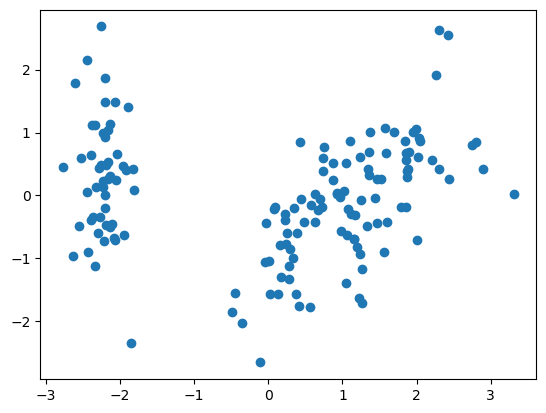

In [37]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

### Debogram

In [57]:
import scipy.cluster.hierarchy as sc

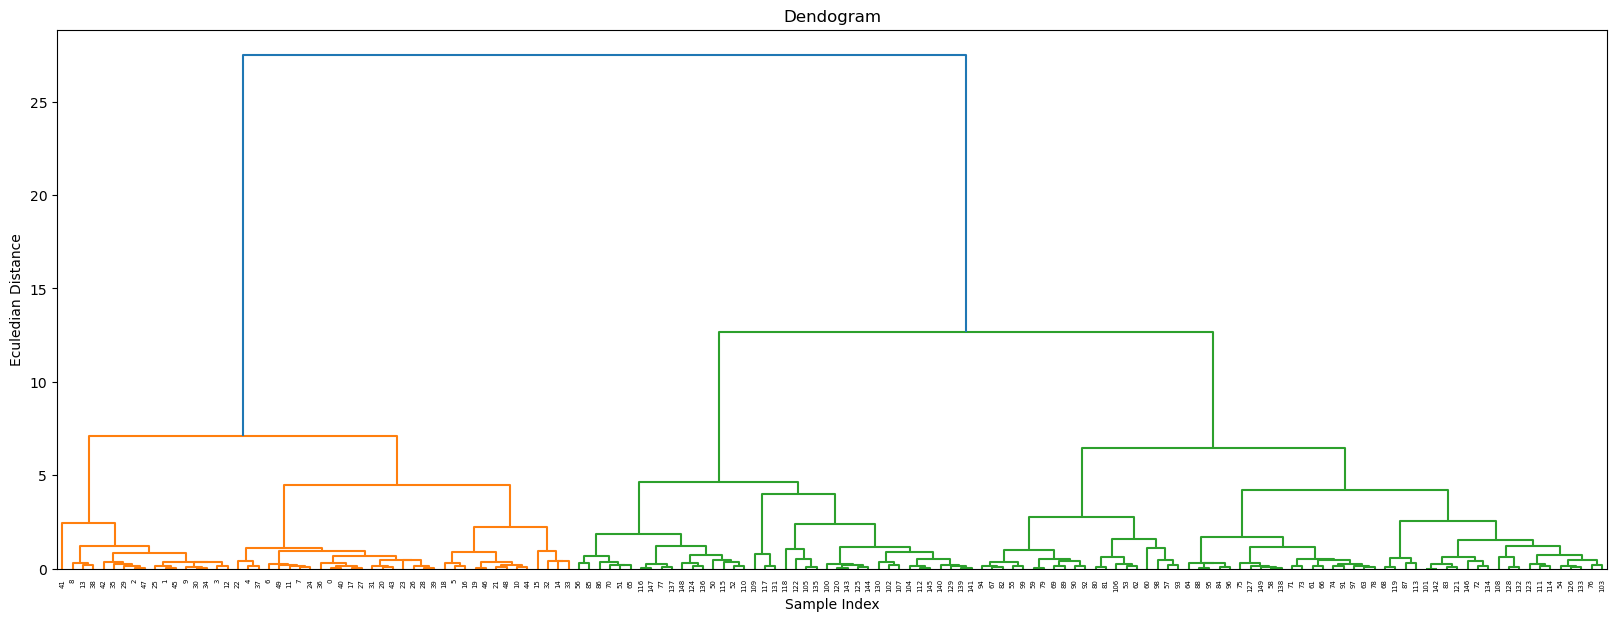

In [58]:
plt.figure(figsize=(20,7))
plt.title("Dendogram")

sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.xlabel("Sample Index")
plt.ylabel("Eculedian Distance")
plt.show()

In [59]:
from sklearn.cluster import AgglomerativeClustering

agg=AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
agg.fit(pca_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [60]:
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

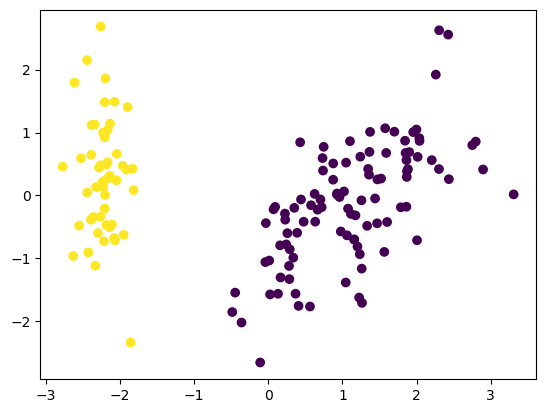

In [61]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=agg.labels_)

In [62]:
from sklearn.metrics import silhouette_score

In [64]:
sil_score=[]
for i in range(2,11):
    agg=AgglomerativeClustering(n_clusters=i,affinity='euclidean', linkage='ward')
    agg.fit(X_scaled)
    score=silhouette_score(X_scaled,agg.labels_)
    sil_score.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

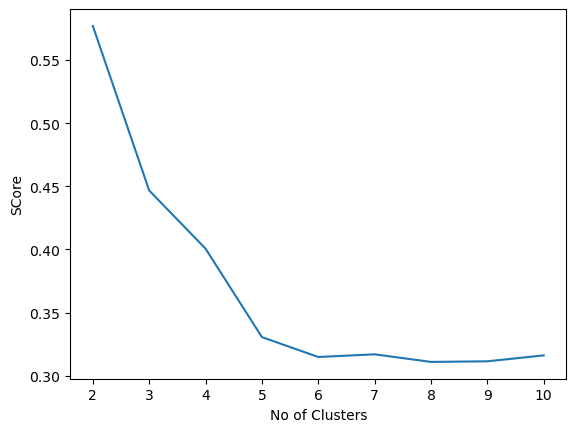

In [67]:
plt.plot(range(2,11),sil_score)
plt.xticks(range(2,11))
plt.xlabel("No of Clusters")
plt.ylabel("SCore")
plt.show()